In [49]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from collections import defaultdict

### Read data from CSV file

In [50]:
# Load the CSV file into a DataFrame
csv_file = 'leetcode_intuition_visualization_statistics.csv'
df = pd.read_csv(csv_file)

# Display the first few rows of the DataFrame
df.head(10)

,Number,Problem Name,Problem Link,Topics,Has Slides,Slides Count,Slides Pages
0,1,two-sum,https://leetcode.com/problems/two-sum/,"Array, Hash Table",False,0,NaN
1,2,add-two-numbers,https://leetcode.com/problems/add-two-numbers/,"Linked List, Math, Recursion",False,0,NaN
2,3,longest-substring-without-repeating-characters,https://leetcode.com/problems/longest-substrin...,"Hash Table, String, Sliding Window",False,0,NaN
3,4,median-of-two-sorted-arrays,https://leetcode.com/problems/median-of-two-so...,"Array, Binary Search, Divide and Conquer",True,1,12
4,5,longest-palindromic-substring,https://leetcode.com/problems/longest-palindro...,"Two Pointers, String, Dynamic Programming",False,0,NaN
5,6,zigzag-conversion,https://leetcode.com/problems/zigzag-conversion/,String,False,0,NaN
6,7,reverse-integer,https://leetcode.com/problems/reverse-integer/,Math,False,0,NaN
7,8,string-to-integer-atoi,https://leetcode.com/problems/string-to-intege...,String,True,2,"7,9"
8,9,palindrome-number,https://leetcode.com/problems/palindrome-number/,Math,False,0,NaN
9,10,regular-expression-matching,https://leetcode.com/problems/regular-expressi...,"String, Dynamic Programming, Recursion",False,0,NaN


### Rate of problems having slides

Number of problems with slides: 108
Total number of problems: 300
The rate of problems having intution slides is: 0.36


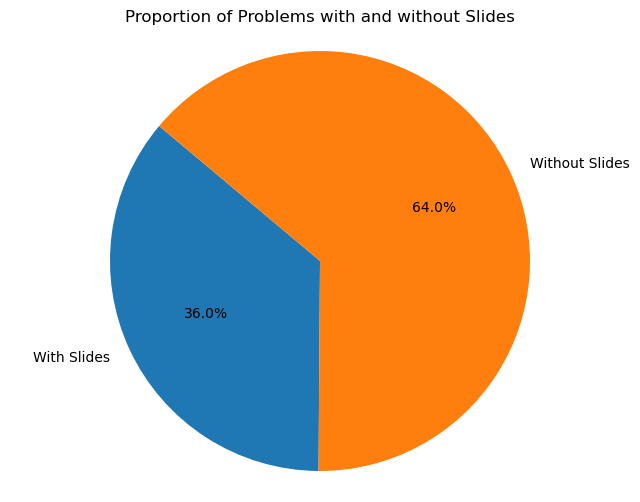

In [51]:
# Calculate the number of problems that have slides
has_slides_count = df['Has Slides'].sum()
total_problems = len(df)
print(f"Number of problems with slides: {has_slides_count}")
print(f"Total number of problems: {total_problems}")
print(f"The rate of problems having intution slides is: {has_slides_count/total_problems}")

# Create a pie chart to visualize the proportion of problems with and without slides
labels = ['With Slides', 'Without Slides']
sizes = [has_slides_count, total_problems - has_slides_count]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Problems with and without Slides')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


### Count of each topic

                    Topic  Count
0                   Array    126
5                  String     77
1              Hash Table     49
10    Dynamic Programming     47
3                    Math     42
27            Binary Tree     42
25                   Tree     42
9            Two Pointers     42
26     Depth-First Search     38
14           Backtracking     28
2             Linked List     27
13                Sorting     25
29   Breadth-First Search     24
15                  Stack     21
7           Binary Search     21
4               Recursion     20
20                 Matrix     20
19       Bit Manipulation     17
32                 Design     16
8      Divide and Conquer     14
41               Database     13
28     Binary Search Tree     13
11                 Greedy     10
6          Sliding Window      9
22             Simulation      9
16  Heap (Priority Queue)      8
12                   Trie      6
31                  Graph      6
24            Memoization      5
30        

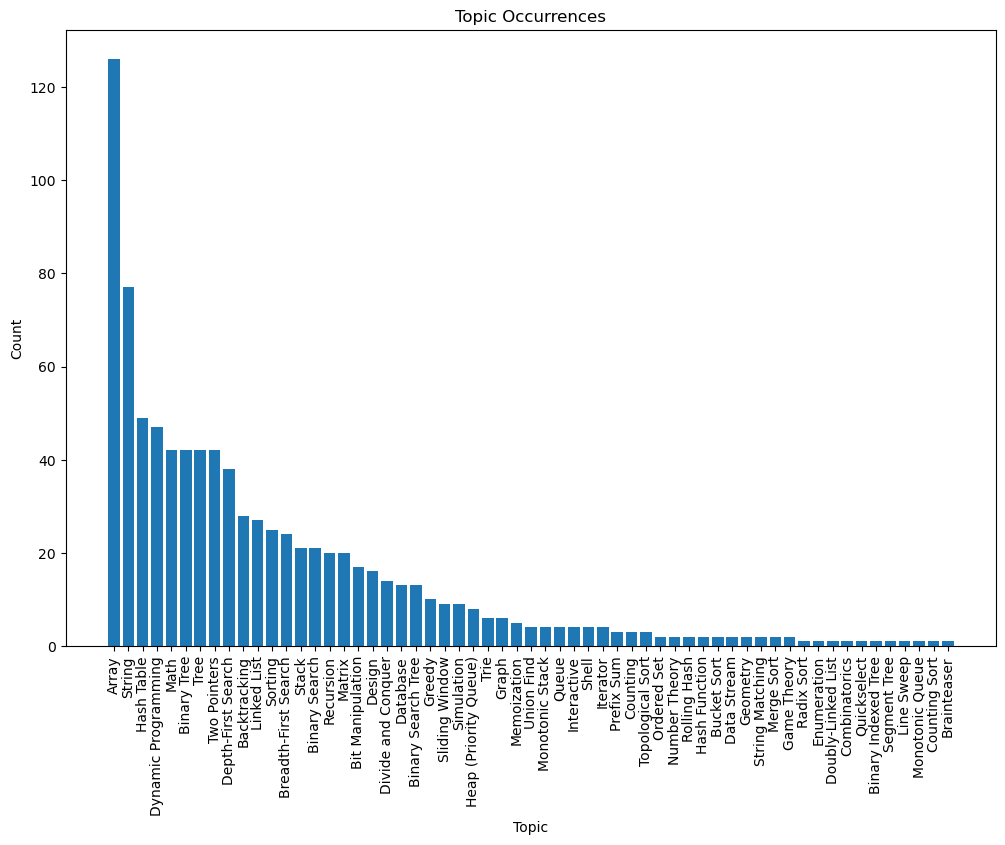

In [52]:
# Split the topics and count each occurrence
all_topics = []

for topics in df['Topics']:
    if isinstance(topics, str):  # Check if the topics value is a string
        all_topics.extend(topics.split(', '))

# Count the frequency of each topic
topic_counts = Counter(all_topics)

# Convert the counter to a DataFrame for better visualization
topic_counts_df = pd.DataFrame(topic_counts.items(), columns=['Topic', 'Count'])
topic_counts_df = topic_counts_df.sort_values(by='Count', ascending=False)

# Display the topic counts
print(topic_counts_df)

# Plot the most common topics
plt.figure(figsize=(12, 8))
plt.bar(topic_counts_df['Topic'], topic_counts_df['Count'])
plt.xticks(rotation=90)
plt.title('Topic Occurrences')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()

### Problems having slides under each topic

Topic Rates (Top 30 by Slides Count)
                    Topic  Total Count  Slides Count  Slides Rate
0                   Array          126            53     0.420635
5                  String           77            32     0.415584
10    Dynamic Programming           47            23     0.489362
27            Binary Tree           42            20     0.476190
26     Depth-First Search           38            20     0.526316
25                   Tree           42            20     0.476190
1              Hash Table           49            19     0.387755
9            Two Pointers           42            17     0.404762
15                  Stack           21            12     0.571429
3                    Math           42            12     0.285714
20                 Matrix           20            11     0.550000
29   Breadth-First Search           24            10     0.416667
14           Backtracking           28             9     0.321429
8      Divide and Conquer           14 

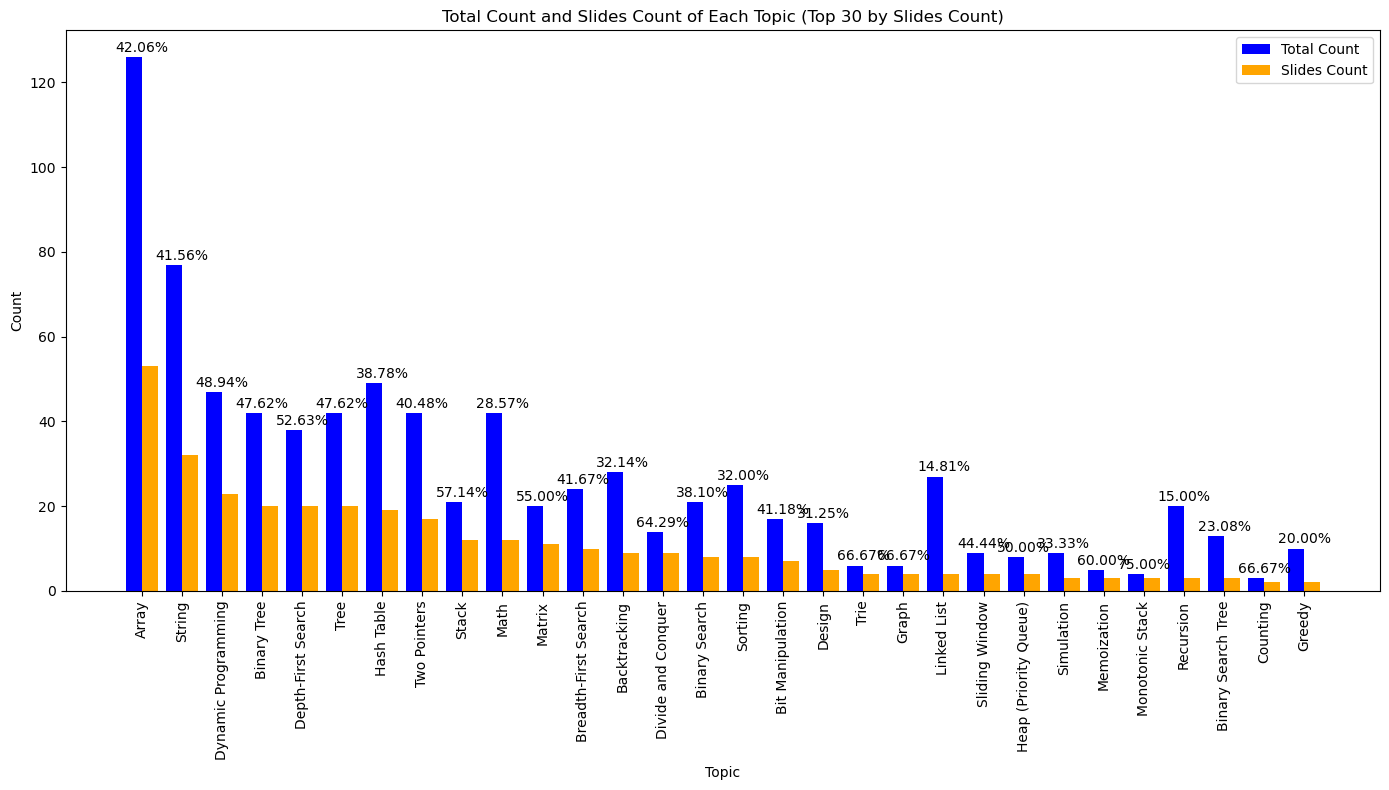

In [58]:
# Initialize dictionaries to count total problems and problems with slides for each topic
topic_problem_count = defaultdict(int)
topic_slides_count = defaultdict(int)

# Iterate through each problem in the DataFrame
for index, row in df.iterrows():
    topics = row['Topics']
    has_slides = row['Has Slides']
    
    if isinstance(topics, str):  # Check if the topics value is a string
        topics_list = topics.split(', ')
        for topic in topics_list:
            topic_problem_count[topic] += 1
            if has_slides:
                topic_slides_count[topic] += 1

# Convert the results to a DataFrame for better visualization
topic_df = pd.DataFrame({
    'Topic': list(topic_problem_count.keys()),
    'Total Count': list(topic_problem_count.values()),
    'Slides Count': [topic_slides_count[topic] for topic in topic_problem_count]
})

# Calculate the slides rate
topic_df['Slides Rate'] = topic_df['Slides Count'] / topic_df['Total Count']

# Sort the DataFrame by the slides count and select the top 30
topic_df = topic_df.sort_values(by='Slides Count', ascending=False).head(30)

# Print the table
print("Topic Rates (Top 30 by Slides Count)")
print(topic_df[['Topic', 'Total Count', 'Slides Count', 'Slides Rate']])

# Plot the bar chart
plt.figure(figsize=(14, 8))
bar_width = 0.4
index = range(len(topic_df))

bars1 = plt.bar(index, topic_df['Total Count'], bar_width, label='Total Count', color='blue')
bars2 = plt.bar([i + bar_width for i in index], topic_df['Slides Count'], bar_width, label='Slides Count', color='orange')

plt.xlabel('Topic')
plt.ylabel('Count')
plt.title('Total Count and Slides Count of Each Topic (Top 30 by Slides Count)')
plt.xticks([i + bar_width / 2 for i in index], topic_df['Topic'], rotation=90)
plt.legend()

# Annotate the bars with the slides rate
for i in index:
    plt.text(i + bar_width / 2, max(bars1[i].get_height(), bars2[i].get_height()) + 0.5,
             f'{topic_df["Slides Rate"].iloc[i]:.2%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Count of topics among problems having slides

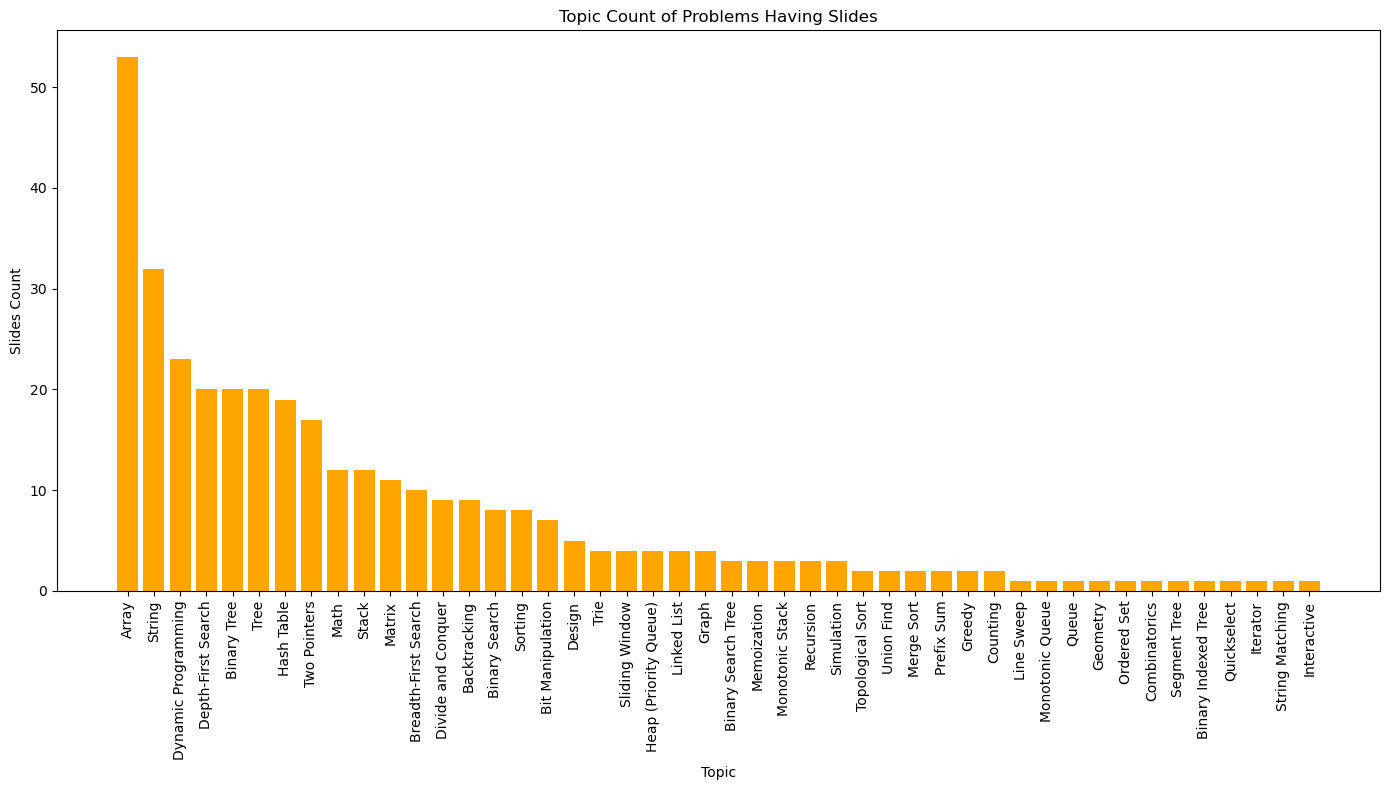

In [54]:
# Filter the DataFrame to include only problems that have slides
df_with_slides = df[df['Has Slides'] == 1]

# Initialize a dictionary to count the topics of problems having slides
topic_slides_count = defaultdict(int)

# Iterate through each problem with slides in the DataFrame
for index, row in df_with_slides.iterrows():
    topics = row['Topics']
    
    if isinstance(topics, str):  # Check if the topics value is a string
        topics_list = topics.split(', ')
        for topic in topics_list:
            topic_slides_count[topic] += 1

# Convert the results to a DataFrame for better visualization
topic_slides_df = pd.DataFrame({
    'Topic': list(topic_slides_count.keys()),
    'Slides Count': list(topic_slides_count.values())
})

# Sort the DataFrame by the slides count
topic_slides_df = topic_slides_df.sort_values(by='Slides Count', ascending=False)

# Plot the bar chart
plt.figure(figsize=(14, 8))
plt.bar(topic_slides_df['Topic'], topic_slides_df['Slides Count'], color='orange')
plt.xlabel('Topic')
plt.ylabel('Slides Count')
plt.title('Topic Count of Problems Having Slides')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Rate of problems having more than 1 slides

Number of problems with no slides: 192
Number of problems with 1 slide: 74
Number of problems with more than 1 slide: 34
Total number of problems: 300
Rate of problems with no slides: 64.00%
Rate of problems with 1 slide: 24.67%
Rate of problems with more than 1 slide: 11.33%


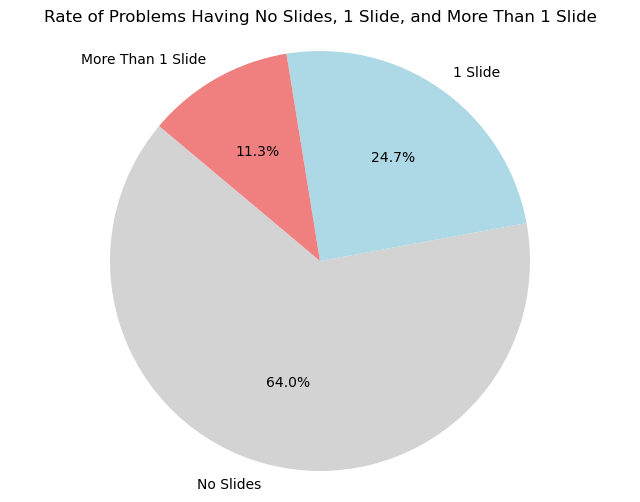

In [55]:
# Calculate the number of problems with no slides, 1 slide, and more than 1 slide
no_slides_count = df[df['Slides Count'] == 0].shape[0]
one_slide_count = df[df['Slides Count'] == 1].shape[0]
more_than_one_slide_count = df[df['Slides Count'] > 1].shape[0]

# Calculate the total number of problems
total_problems = df.shape[0]

# Calculate the rates
no_slides_rate = no_slides_count / total_problems
one_slide_rate = one_slide_count / total_problems
more_than_one_slide_rate = more_than_one_slide_count / total_problems

print(f"Number of problems with no slides: {no_slides_count}")
print(f"Number of problems with 1 slide: {one_slide_count}")
print(f"Number of problems with more than 1 slide: {more_than_one_slide_count}")
print(f"Total number of problems: {total_problems}")
print(f"Rate of problems with no slides: {no_slides_rate:.2%}")
print(f"Rate of problems with 1 slide: {one_slide_rate:.2%}")
print(f"Rate of problems with more than 1 slide: {more_than_one_slide_rate:.2%}")

# Plot the rate of problems having no slides, 1 slide, and more than 1 slide
labels = ['No Slides', '1 Slide', 'More Than 1 Slide']
sizes = [no_slides_count, one_slide_count, more_than_one_slide_count]
colors = ['lightgray', 'lightblue', 'lightcoral']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Rate of Problems Having No Slides, 1 Slide, and More Than 1 Slide')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
